IMPORT LIBRARIES

In [0]:
import tensorflow as tf


LOAD DATA

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
x_train = x_train
y_train = y_train
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
print(y_train.shape)


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
(60000,)


In [0]:
y_train[0]

5

MAKE ANN MODEL

In [0]:

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Using TensorFlow backend.


FIT MODEL

In [0]:
%time model.fit(x=x_train,y=y_train,batch_size=32, epochs=10,validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 51s 1ms/step - loss: 0.1754 - acc: 0.9465 - val_loss: 0.0575 - val_acc: 0.9848
Epoch 2/10
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0613 - acc: 0.9811 - val_loss: 0.0492 - val_acc: 0.9851
Epoch 3/10
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0449 - acc: 0.9861 - val_loss: 0.0439 - val_acc: 0.9869
Epoch 4/10
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0352 - acc: 0.9882 - val_loss: 0.0464 - val_acc: 0.9867
Epoch 5/10
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0291 - acc: 0.9900 - val_loss: 0.0478 - val_acc: 0.9865
Epoch 6/10
48000/48000 [==============================] - 53s 1ms/step - loss: 0.0235 - acc: 0.9924 - val_loss: 0.0446 - val_acc: 0.9882
Epoch 7/10
48000/48000 [==

PREDICT ON TEST DATA

In [0]:
predicts = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 328us/step


Accuracy of prediction

In [0]:
print("Test Accuracy = " + str(predicts[1]))

Test Accuracy = 0.9877


In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
print(classification_report(y_test, model.predict_classes(x_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [0]:
cm = confusion_matrix(y_test, model.predict_classes(x_test))
print(cm)

[[ 976    0    0    0    0    0    1    1    2    0]
 [   0 1132    0    0    0    1    2    0    0    0]
 [   1    4 1016    2    0    0    2    4    3    0]
 [   0    1    1 1001    0    5    0    0    2    0]
 [   0    3    0    0  970    0    3    0    1    5]
 [   1    0    1    7    0  878    2    0    1    2]
 [   5    3    1    0    1    2  944    0    2    0]
 [   0    4    8    1    1    0    0 1013    0    1]
 [   1    1    0    0    0    0    0    1  969    2]
 [   2    3    0    2    5    5    0    4   10  978]]


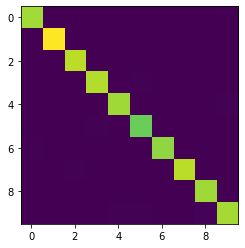

In [0]:
import matplotlib.pyplot as plt

plt.imshow(cm)